# 1.1 Minimum current for at least one spike

I'm assuming that the current injection is constant.
Through manual binary search, we see that for 2.336, there is no spike, but at 2.337, there is a spike.
So, the minimum current for one spike is **~2.337 uA/cm^2**

<IPython.core.display.Javascript object>


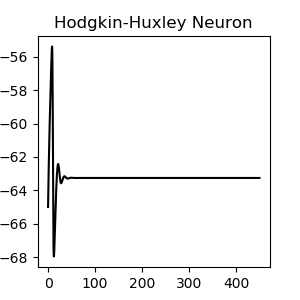

In [53]:
#%matplotlib notebook
from HodgkinHuxley import HodgkinHuxley
model = HodgkinHuxley()
model.I_inj = lambda t: 2.336
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


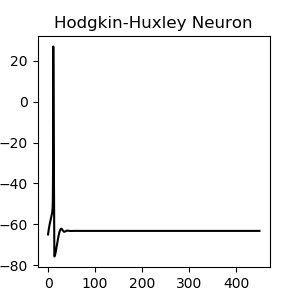

In [54]:
model.I_inj = lambda t: 2.337
model.gen_plots(["V"])

# 1.2 What is the minimum current you need to inject to get the cell to fire for the full duration?

**~6.260 uA/cm^2** current is the minimum. Here we see with 6.259, the cell stops firing towards the end, but at 6.260, it lasts for the entire duration.

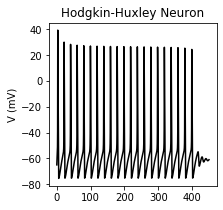

In [4]:
model = HodgkinHuxley()
model.I_inj = lambda t: 6.259
model.gen_plots(["V"])

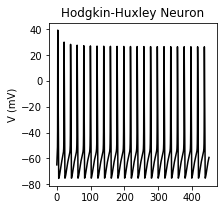

In [5]:
model = HodgkinHuxley()
model.I_inj = lambda t: 6.260
model.gen_plots(["V"])

# 1.3 How much does a 10-fold increase in injected current from the repetitive firing current increase the firing rate? 

Number of peaks = 23


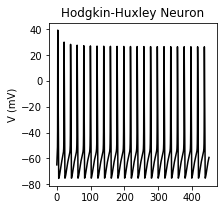

In [6]:
model = HodgkinHuxley()
model.I_inj = lambda t: 6.26
model.gen_plots(["V"])
print("Number of peaks =", HodgkinHuxley.count_peaks(model.V))

Number of peaks = 57


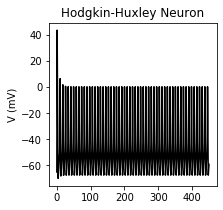

In [7]:
model = HodgkinHuxley()
model.I_inj = lambda t: 62.60
model.gen_plots(["V"])
print("Number of peaks =", HodgkinHuxley.count_peaks(model.V))

10-fold increase in injected current from 1.2 increases firing counts from **23 to 56 (~243% multiplier)**.

# 1.4 What happens for a 100-fold increase? Why does this happen?

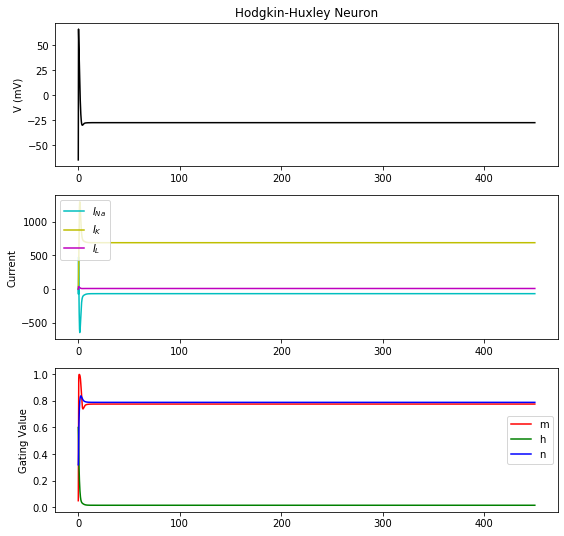

In [21]:
model = HodgkinHuxley()
model.I_inj = lambda t: 626.0
model.gen_plots(["V", "I", "gate"])

After the 100-fold increase, there is only 1 spike throughout the entire session.
Furthermore, the V is maintained at -25 mV.

I.. don't have a good mathy answer for this yet. I can only offer a non-math observation: With I_inj set to 150 we can see the action potentials stop happening, and oscillations happen, and as we increase the I_inj from here on out the, oscillation amplitude gets smaller until it becomes a straight line. 

Below is the plot when I_inj is 150.

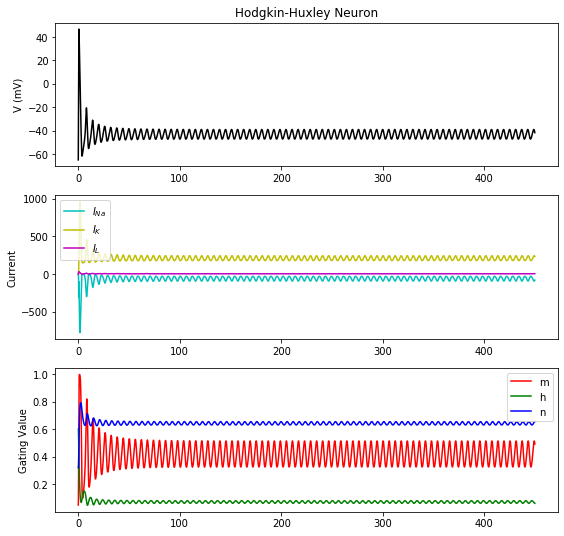

In [24]:
model = HodgkinHuxley()
model.I_inj = lambda t: 150.0
model.gen_plots(["V", "I", "gate"])

# 1.5 Is there any current you can inject to get a half height action potential?

<IPython.core.display.Javascript object>


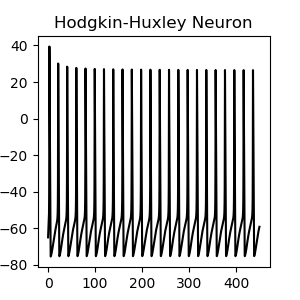

In [35]:
model = HodgkinHuxley()
model.I_inj = lambda t: 6.260
model.gen_plots(["V"])
# With I_inj = 6.260. Action potential height ~ 100. From -75 to 25. 

<IPython.core.display.Javascript object>


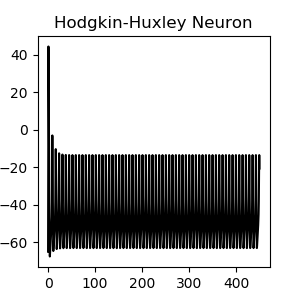

Number of peaks = 64


In [36]:
model = HodgkinHuxley()
model.I_inj = lambda t: 87
model.gen_plots(["V"])
print("Number of peaks =", HodgkinHuxley.count_peaks(model.V))
# With I_inj = 87. Action potential height ~ 50. From -63 to -13. 

Yes, but increasing I_inj from **6.26 to 87.00**, we decreased the action potential height from **100 to 50**.

# Threshold current v.s. pulse duration

<IPython.core.display.Javascript object>


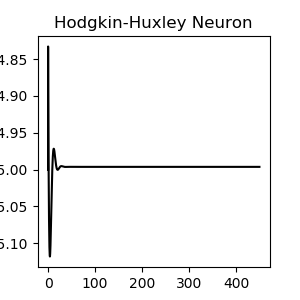

In [98]:
pulse_duration = 0.1
current = 2
model = HodgkinHuxley()
model.I_inj = lambda t: current if t <= pulse_duration else 0
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


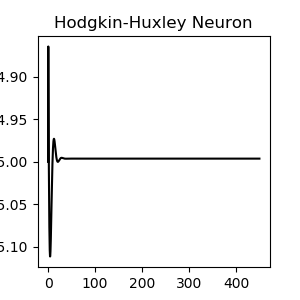

In [99]:
pulse_duration = 0.5
current = 0.5
model = HodgkinHuxley()
model.I_inj = lambda t: current if t <= pulse_duration else 0
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


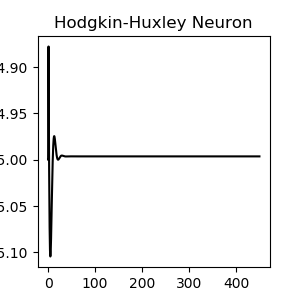

In [101]:
pulse_duration = 1
current = 0.3
model = HodgkinHuxley()
model.I_inj = lambda t: current if t <= pulse_duration else 0
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


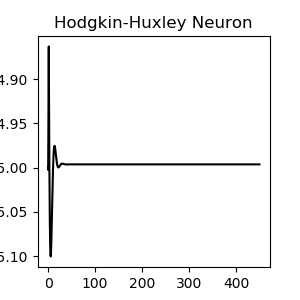

In [104]:
pulse_duration = 1.5
current = 0.25
model = HodgkinHuxley()
model.I_inj = lambda t: current if t <= pulse_duration else 0
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


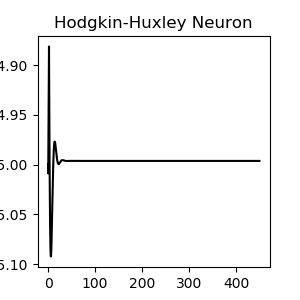

In [106]:
pulse_duration = 2
current = 0.20
model = HodgkinHuxley()
model.I_inj = lambda t: current if t <= pulse_duration else 0
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


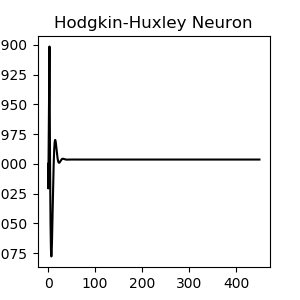

In [108]:
pulse_duration = 3
current = 0.15
model = HodgkinHuxley()
model.I_inj = lambda t: current if t <= pulse_duration else 0
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


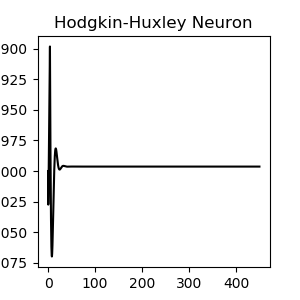

In [111]:
pulse_duration = 4
current = 0.13
model = HodgkinHuxley()
model.I_inj = lambda t: current if t <= pulse_duration else 0
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


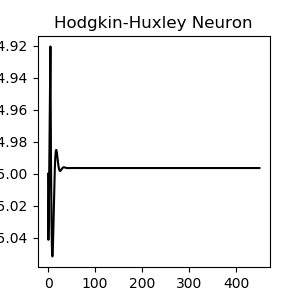

In [117]:
pulse_duration = 5
current = 0.10
model = HodgkinHuxley()
model.I_inj = lambda t: current if t <= pulse_duration else 0
model.gen_plots(["V"])

<IPython.core.display.Javascript object>


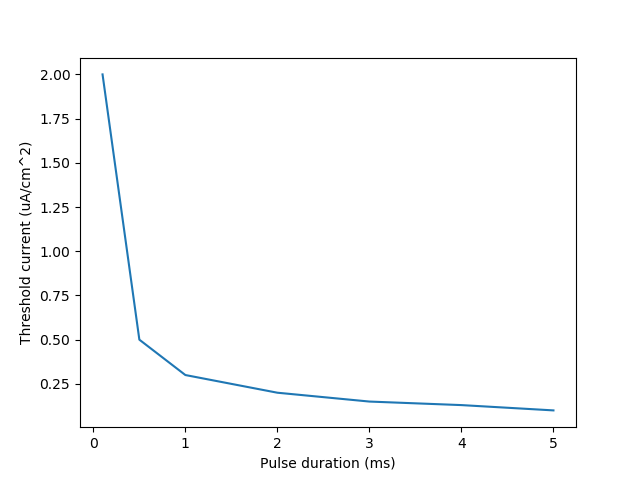

Text(0.5, 0, 'Pulse duration (ms)')

In [120]:
import pylab as plt
pulse_durations = [0.1, 0.5, 1, 1.5, 2, 3, 4, 5]
threshold_currents = [2, 0.5, 0.3, 0.25, 0.2, 0.15, 0.13, 0.10]

fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(pulse_durations, threshold_currents)
ax.set_ylabel("Threshold current (uA/cm^2)")
ax.set_xlabel("Pulse duration (ms)")

As seen above, the higher the pulse duration is, the lower the threshold current is. The decrease seems to be exponential as well. Btw, I classify a voltage time series graph as an action potential if max voltage from baseline is similar to min voltage from baseline.